In [30]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  8 18:24:20 2020

@author: davsu428
"""
import re
import os
import pandas as pd
from heapq import nlargest
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
master_array = [] #append results to array to create data frame

for filename in os.listdir('season/'):
    if filename.endswith(".html"):
        split_name = filename.split('.') #obtain the season and episodes
        season = split_name[0]   
        episode = split_name[1]
        #TODO method to get each line of the script
        master_array.append([season, episode])
    else:
        pass
numblines = dict()
numblines["Episode"] = []
numblines["Number of lines"] = []
numblines["Number of words"] = []
numblines["Different words used"] = []
numblines["Words per line"] = []
numblines["Different words ratio"] = []
numblines["Exclamation marks"] = []
numblines["Question marks"] = []
numblines["Word"] = []
numblines["Most common Monica"] = []
numblines["Most common Rachel"] = []
numblines["Most common Phoebe"] = []
numblines["Most common Chandler"] = []
numblines["Most common Ross"] = []
numblines["Most common Joey"] = []
numblines["Name Monica"] = []
numblines["Name Rachel"] = []
numblines["Name Phoebe"] = []
numblines["Name Chandler"] = []
numblines["Name Ross"] = []
numblines["Name Joey"] = []
numblines["Name total"] = []
#numblines["Most common 30"] = []
#numblines["Most common 50"] = []
numblines["Character"] = []

loop = 0
for num, ep in enumerate(master_array):
#for num in [0]:
    filename=master_array[num][0]+'.'+master_array[num][1]

    f = open('season/'+filename, 'r')
    data = f.read()

    soup = BeautifulSoup(data)
    readsoup = BeautifulSoup(data)

    soup = soup.get_text().translate(str.maketrans({'\n': ' ', '\xa0': ''}))
    pattern = re.compile(r'\s(?=\w+(?=:))') # store the regex
    result = re.split(pattern, soup) # split the script where our pattern matched (pink dot)


    episode_array=[]
    for item in result:
        split_line = item.split(': ')
        try:
            character = split_line[0]
            speech = split_line[1]
            episode_array.append([character, speech])
        except:
            pass
    
    df = pd.DataFrame(episode_array, columns = ['Person','Said'])

    df['Person'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                        'JOEY':'Joey',
                        'MNCA':'Monica','MONICA':'Monica',
                        'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                        'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                        'ROSS':'Ross'},inplace=True)

    curved = re.compile("(\(.*?\))")
    brackets = re.compile("(\[.*?\])")
    scene = re.compile("\[Scene")
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(curved, '', i)

    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(brackets, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(scene, '', i)

    worddicts = {}
    worddicts['Monica'] = {}
    worddicts["Rachel"]={}
    worddicts["Phoebe"]={}
    worddicts["Chandler"]={} 
    worddicts["Ross"]={} 
    worddicts["Joey"]={}
    for i, j in enumerate(df["Person"]):
        if j in worddicts:
            wordlist = Counter((x.rstrip(punctuation).lower() for x in df.iloc[i][1].split()))
            for word in wordlist:
                try:
                    worddicts[j][word] = worddicts[j][word]+1
                except KeyError:
                    worddicts[j][word] = 1
    
    namedict=dict()
    namedict["Rachel"]=[0]*3
    namedict["Phoebe"]=[0]*3
    namedict["Chandler"]=[0]*3
    namedict["Ross"]=[0]*3
    namedict["Joey"]=[0]*3
    namedict["Monica"]=[0]*3
    
    commonwords = {}
    commonwords['Monica']={}
    commonwords["Rachel"]={}
    commonwords["Phoebe"]={}
    commonwords["Chandler"]={} 
    commonwords["Ross"]={} 
    commonwords["Joey"]={}
    for b in namedict:
        for c in namedict:
            commonwords[b][c] = 0

    k = 0
    for i in df["Person"]:
        if i in namedict:
            try:
                namedict[i][0] = namedict[i][0]+1
                namedict[i][1] = namedict[i][1]+Counter(df.iloc[k][1])['!']
                namedict[i][2] = namedict[i][2]+Counter(df.iloc[k][1])['?']
            except:
                pass
        k = k+1
            
    
    for p in namedict:
        for person in namedict:
            try:
                numblines["Name "+person].append(worddicts[p][person.lower()])
            except:
                numblines["Name "+person].append(0)
            for word in nlargest(30, worddicts[person], key=worddicts[person].get):
                if word in nlargest(30, mostcommon[p], key=mostcommon[p].get):
                    try:
                        commonwords[p][person] = commonwords[p][person]+worddicts[person][word]
                    except:
                        commonwords[p][person] = worddicts[p][word]
                else:
                    pass
        try:
            numblines["Number of lines"].append(namedict[p][0])
            numblines["Character"].append(p)
            numblines["Episode"].append(master_array[num][0])
            #numblines["Most common 10"].append(nlargest(10, worddicts[p], key=worddicts[p].get))
            #numblines["Most common 30"].append(nlargest(30, worddicts[p], key=worddicts[p].get))
            #numblines["Most common 50"].append(nlargest(50, worddicts[p], key=worddicts[p].get))
            numblines["Number of words"].append(sum(worddicts[p].values()))
            numblines["Different words used"].append(len(worddicts[p]))
            numblines["Exclamation marks"].append(namedict[p][1])
            numblines["Question marks"].append(namedict[p][2])
            numblines["Words per line"].append(sum(worddicts[p].values())/namedict[p][0])
            numblines["Different words ratio"].append(len(worddicts[p])/sum(worddicts[p].values()))
            numblines["Most common Monica"].append(commonwords[p]["Monica"]/sum(worddicts[p].values()))
            numblines["Most common Rachel"].append(commonwords[p]["Rachel"]/sum(worddicts[p].values()))
            numblines["Most common Phoebe"].append(commonwords[p]["Phoebe"]/sum(worddicts[p].values()))
            numblines["Most common Chandler"].append(commonwords[p]["Chandler"]/sum(worddicts[p].values()))
            numblines["Most common Ross"].append(commonwords[p]["Ross"]/sum(worddicts[p].values()))
            numblines["Most common Joey"].append(commonwords[p]["Joey"]/sum(worddicts[p].values()))
            numblines["Name total"].append(numblines["Name Monica"][loop]+
                                              numblines["Name Joey"][loop]+
                                              numblines["Name Rachel"][loop]+
                                              numblines["Name Chandler"][loop]+
                                              numblines["Name Phoebe"][loop]+
                                              numblines["Name Ross"][loop])
            try:
                numblines["Word"].append(worddicts[p]["smelly"])
            except:
                numblines["Word"].append(0)
        except:
               pass
        loop = loop+1
        
epinfo = pd.DataFrame.from_dict(numblines, orient='index')
epinfo.transpose()
    #plt.bar(list(namedict.keys()), namedict.values(), color='g')
    #plt.show()
#print(df.iloc[3][1])    
#print(df.iloc[9][1])

,Episode,Number of lines,Number of words,Different words used,Words per line,Different words ratio,Exclamation marks,Question marks,Word,Most common Monica,...,Most common Ross,Most common Joey,Name Monica,Name Rachel,Name Phoebe,Name Chandler,Name Ross,Name Joey,Name total,Character
0,0101,49,554,277,11.306122,0.5,28,16,0,0.32491,...,0.229242,0.17509,2,0,0,0,0,0,2,Rachel
1,0101,19,220,156,11.578947,0.709091,7,4,0,0.813636,...,0.545455,0.409091,0,0,0,0,0,0,0,Phoebe
2,0101,39,350,212,8.974359,0.605714,9,8,0,0.528571,...,0.351429,0.277143,0,0,0,0,1,1,2,Chandler
3,0101,47,449,265,9.553191,0.5902,14,21,0,0.387528,...,0.287305,0.200445,0,1,0,1,0,1,3,Ross
4,0101,41,394,232,9.609756,0.588832,20,16,0,0.482234,...,0.304569,0.251269,0,0,1,3,4,1,9,Joey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1017-1018,85,712,332,8.376471,0.466292,40,33,0,0.247191,...,0.344101,0.311798,1,5,0,1,4,0,11,Phoebe
1370,1017-1018,83,642,301,7.73494,0.468847,29,29,0,0.292835,...,0.389408,0.342679,1,0,1,0,2,1,5,Chandler
1371,1017-1018,112,719,276,6.419643,0.383866,36,37,0,0.255911,...,0.350487,0.300417,2,5,4,0,0,0,11,Ross
1372,1017-1018,84,687,281,8.178571,0.409025,32,41,0,0.256186,...,0.347889,0.323144,3,1,0,3,2,0,9,Joey


In [71]:
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
import numpy as np
import pandas as pd
import sklearn.discriminant_analysis as skl_da
import sklearn.preprocessing as skl_pre
import math
import itertools
from sklearn.decomposition import PCA
epinfo = pd.read_csv('epinfo.csv')
#epinfo = epinfo.transpose()
features = [#'Episode', 
            'Number of lines', 
            'Number of words', 
            'Different words used',
            'Words per line', 
            'Different words ratio',
            'Exclamation marks', 
            'Question marks', 
            'Word',
            "Most common Monica",
            "Most common Rachel",
            "Most common Phoebe",
            "Most common Chandler",
            "Most common Ross",
            "Most common Joey",
            #'Most common 10',
            #'Most common 30', 
            #'Most common 50', 
             ]
Y_encode = [4, 3, 0, 5, 1, 2]*229
def aic(model, Y, Y_hat):
    k = model.coef_.size + model.get_params()['fit_intercept'] + 1
    n = Y.size
    loglik = np.sum(np.log(model.predict_proba(X)[np.arange(n), Y_encode]))
    
    return 2 * (k - loglik)

X = epinfo[list(features)]
Y = epinfo['Character']

X_train, X_test, Y_train, Y_test = skl_ms.train_test_split(X,Y, test_size = 0.1)

scaler = skl_pre.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

model = skl_lm.LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=10000, 
                                  penalty='l2', fit_intercept = False)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
#Y_hat = model.predict(X)
print(np.mean(prediction==Y_test))
print(pd.crosstab(prediction, Y_test))
#print(aic(model, Y, Y_encode))
print(explained_variance)

0.2971014492753623
Character  Chandler  Joey  Monica  Phoebe  Rachel  Ross
row_0                                                  
Chandler          7     5       3       3       5     7
Joey              2     7       0       1       2     3
Monica            3     0       2       0       3     2
Phoebe            8     2       6       9       2     3
Rachel            2     3       2       5      11     3
Ross              8     6       4       1       3     5
[0.46474095 0.11535628 0.0720705  0.06301343 0.05455032 0.05227147
 0.04119124 0.03753793 0.03287108 0.02944315 0.02079804 0.01377807
 0.00153192 0.00084562]


0.40830424203956417
Best features for accuracy
['Number of lines', 'Number of words', 'Different words used', 'Words per line', 'Different words ratio', 'Exclamation marks', 'Question marks', 'Word', 'Most common Monica', 'Most common Rachel', 'Most common Phoebe', 'Most common Chandler', 'Most common Ross', 'Most common Joey', 'Name Monica', 'Name Rachel', 'Name Phoebe', 'Name Joey', 'Name Chandler', 'Name Ross', 'Name total']


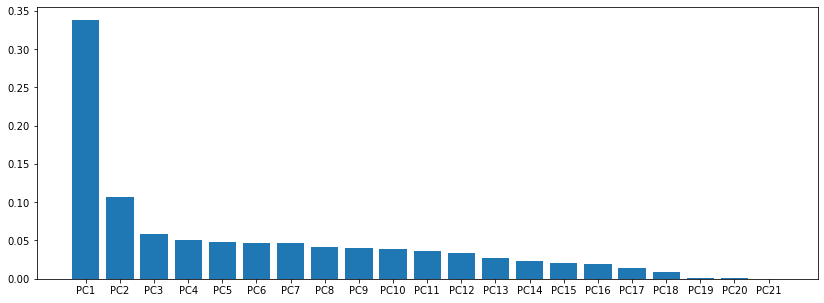

[3.37742539e-01 1.06110080e-01 5.85545379e-02 5.12095174e-02
 4.82859293e-02 4.71801954e-02 4.67435896e-02 4.15397129e-02
 3.97857595e-02 3.83793130e-02 3.60808359e-02 3.34455415e-02
 2.71639732e-02 2.33216839e-02 2.11421344e-02 1.90144780e-02
 1.39086793e-02 8.91419729e-03 9.62439351e-04 5.14862833e-04
 3.37254941e-32]


In [9]:
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
import numpy as np
import pandas as pd
import sklearn.discriminant_analysis as skl_da
import sklearn.preprocessing as skl_pre
import math
import itertools
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
epinfo = pd.read_csv('epinfo.csv')
#epinfo = epinfo.transpose()
factors = [#'Episode', 
            'Number of lines', 
            'Number of words', 
            'Different words used',
            'Words per line', 
            'Different words ratio',
            'Exclamation marks', 
            'Question marks', 
            'Word',
            "Most common Monica",
            "Most common Rachel",
            "Most common Phoebe",
            "Most common Chandler",
            "Most common Ross",
            "Most common Joey",
            "Name Monica",
            "Name Rachel",
            "Name Phoebe",
            "Name Joey",
            "Name Chandler",
            "Name Ross",
            "Name total",
             ]
num_features = 21
n_fold = 10
n_comp = 21
Y_encode = [4, 3, 0, 5, 1, 2]*229
def aic(model, Y, Y_hat):
    k = model.coef_.size + model.get_params()['fit_intercept'] + 1
    n = Y.size
    loglik = np.sum(np.log(model.predict_proba(X)[np.arange(n), Y_encode]))
    return 2 * (k - loglik)

model = skl_lm.LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=10000, 
                                  penalty='l2', fit_intercept = False)
primeacc = [0]
#primeAIC = [5000]
best_features = []
#best_fAIC = []
for features in itertools.combinations(factors, num_features):
    X = epinfo[list(features)]
    Y = epinfo['Character']
    cv = skl_ms.KFold(n_splits = n_fold, shuffle = True)
    accuracy = []
    for train_index, val_index in cv.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]
        scaler = skl_pre.StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        pca = PCA(n_components = n_comp)
        X_train = pca.fit_transform(X_train)
        X_val = pca.transform(X_val)
        model.fit(X_train, Y_train)
        prediction = model.predict(X_val)
        accuracy.append(np.mean(prediction==Y_val))
    if np.mean(accuracy) > max(primeacc):
        best_features = list(features)
        explained_variance = pca.explained_variance_ratio_
        principalComponents = X_train
    #if aic(model, Y, Y_encode) < min(primeAIC):
        #best_fAIC = list(features)
    #primeAIC.append(aic(model, Y, Y_encode))
    primeacc.append(np.mean(accuracy))
    
print(np.max(primeacc))
#print(np.min(primeAIC))
print('Best features for accuracy')
print(best_features)
#print(pd.crosstab(prediction, Y_val))
#print('Best features for low AIC')
#print(best_fAIC)
plt.figure(figsize=(14, 5))
pcplot = []
for i in range(n_comp):
    pcplot.append(f'PC{i+1}')
plt.bar(pcplot, explained_variance)
plt.show()
print(pca.explained_variance_ratio_)
#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2','principal component 3'])
#plt.matshow(pca.components_,cmap='viridis')
#plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)

In [1]:
import re
import os
import pandas as pd
from heapq import nlargest
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
master_array = [] #append results to array to create data frame

for filename in os.listdir('season/'):
    if filename.endswith(".html"):
        split_name = filename.split('.') #obtain the season and episodes
        season = split_name[0]   
        episode = split_name[1]
        #TODO method to get each line of the script
        master_array.append([season, episode])
    else:
        pass
master_df = pd.DataFrame(columns = ['Person','Said'])
for num, ep in enumerate(master_array):
#for num in [0, 1]:
    filename=master_array[num][0]+'.'+master_array[num][1]

    f = open('season/'+filename, 'r')
    data = f.read()

    soup = BeautifulSoup(data)
    readsoup = BeautifulSoup(data)

    soup = soup.get_text().translate(str.maketrans({'\n': ' ', '\xa0': ''}))
    pattern = re.compile(r'\s(?=\w+(?=:))') # store the regex
    result = re.split(pattern, soup) # split the script where our pattern matched (pink dot)


    episode_array=[]
    for item in result:
        split_line = item.split(': ')
        try:
            character = split_line[0]
            speech = split_line[1]
            episode_array.append([character, speech])
        except:
            pass
    
    df = pd.DataFrame(episode_array, columns = ['Person','Said'])

    df['Person'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                        'JOEY':'Joey',
                        'MNCA':'Monica','MONICA':'Monica',
                        'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                        'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                        'ROSS':'Ross'},inplace=True)

    curved = re.compile("(\(.*?\))")
    brackets = re.compile("(\[.*?\])")
    scene = re.compile("\[Scene")
    cbreak = re.compile("Commercial break", re.IGNORECASE)
    theend = re.compile("The end", re.IGNORECASE)
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(curved, '', i)

    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(brackets, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(scene, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(cbreak, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(theend, '', i)
    master_df = master_df.append(df, ignore_index=True)

print(master_df)

         Person                                               Said
0            by           Marta Kauffman & David Crane Transcribed
1            by                  guineapig Additional transcribing
2            by                                   Eric Aasen (Note
3        Monica  There's nothing to tell! He's just some guy I ...
4          Joey  C'mon, you're going out with the guy! There's ...
...         ...                                                ...
62747  Chandler                           Oh, it's gonna be okay. 
62748    Rachel   Do you guys have to go to the new house right...
62749    Monica                                  We got some time.
62750    Rachel                   Okay, should we get some coffee?
62751  Chandler                                 Sure. Where?      

[62752 rows x 2 columns]


In [17]:
import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms
import numpy as np
from zeugma.embeddings import EmbeddingTransformer
corpus = []
Y = []
charlist = ["Chandler", "Joey", "Ross", "Monica", "Rachel", "Phoebe"]
for i, j in enumerate(master_df['Person']):
    if j in charlist:
        Y.append(master_df["Person"][i])
        corpus.append(master_df["Said"][i].rstrip(punctuation).lower())
        
corpus_train, corpus_test, Y_train, Y_test = skl_ms.train_test_split(corpus, Y, test_size = 0.1 , random_state=1)

glove = EmbeddingTransformer('glove')
X_train = glove.transform(corpus_train)

model = skl_lm.LogisticRegression(solver='newton-cg', multi_class='multinomial', max_iter=10000, 
                                  penalty='l2', fit_intercept = False)
model.fit(X_train, Y_train)

X_test = glove.transform(corpus_test)
prediction = model.predict(X_test)
print(np.mean(prediction==Y_test))

0.2009273570324575


C:\Users\Leon\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Leon\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [16]:
#print(readsoup.get_text())
#soup1 = soup.get_text(' ', strip=True).replace('\n', ' ')
#soup2 = soup1.replace('\', '')
#[text for text in soup.stripped_strings]
#soup = re.sub(r'\s*\n' , ' ', soup.get_text())


# COULDNT GET THIS CODE TO WORK
#filename='0101.html'
#g = open('season/'+filename, 'r')
#data = g.read()
#
#from html.parser import HTMLParser
#
#class HTMLFilter(HTMLParser):
#    text = ""
#    def handle_data(self, data):
#        self.text += data
#
#f = HTMLFilter()

#script =f.feed(data) #read the script file
corpus.shape

AttributeError: 'list' object has no attribute 'shape'

In [2]:
import re
import os
import pandas as pd
from heapq import nlargest
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
master_array = [] #append results to array to create data frame
mostcommon = {}
mostcommon["Monica"] = {}
mostcommon["Rachel"] = {}
mostcommon["Phoebe"] = {}
mostcommon["Chandler"] = {}
mostcommon["Ross"] = {}
mostcommon["Joey"] = {}
for filename in os.listdir('season/'):
    if filename.endswith(".html"):
        split_name = filename.split('.') #obtain the season and episodes
        season = split_name[0]   
        episode = split_name[1]
        #TODO method to get each line of the script
        master_array.append([season, episode])
    else:
        pass
for num, ep in enumerate(master_array):
    filename=master_array[num][0]+'.'+master_array[num][1]

    f = open('season/'+filename, 'r')
    data = f.read()

    soup = BeautifulSoup(data)
    readsoup = BeautifulSoup(data)

    soup = soup.get_text().translate(str.maketrans({'\n': ' ', '\xa0': ''}))
    pattern = re.compile(r'\s(?=\w+(?=:))') # store the regex
    result = re.split(pattern, soup) # split the script where our pattern matched (pink dot)


    episode_array=[]
    for item in result:
        split_line = item.split(': ')
        try:
            character = split_line[0]
            speech = split_line[1]
            episode_array.append([character, speech])
        except:
            pass
    
    df = pd.DataFrame(episode_array, columns = ['Person','Said'])

    df['Person'].replace({'CHAN':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler',
                        'JOEY':'Joey',
                        'MNCA':'Monica','MONICA':'Monica',
                        'PHOE':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe',
                        'Rache':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel',
                        'ROSS':'Ross'},inplace=True)

    curved = re.compile("(\(.*?\))")
    brackets = re.compile("(\[.*?\])")
    scene = re.compile("\[Scene")
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(curved, '', i)

    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(brackets, '', i)
        
    for j,i in enumerate(df['Said']):
        df.iloc[j][1] =re.sub(scene, '', i)

    worddicts = {}
    worddicts['Monica'] = {}
    worddicts["Rachel"]={}
    worddicts["Phoebe"]={}
    worddicts["Chandler"]={} 
    worddicts["Ross"]={} 
    worddicts["Joey"]={}
    for i, j in enumerate(df["Person"]):
        if j in worddicts:
            wordlist = Counter((x.rstrip(punctuation).lower() for x in df.iloc[i][1].split()))
            for word in wordlist:
                try:
                    worddicts[j][word] = worddicts[j][word]+1
                except KeyError:
                    worddicts[j][word] = 1
                    
    for p in namedict:
        for key in worddicts[p].keys():
            try:
                mostcommon[p][key] = mostcommon[p][key]+worddicts[p][key]
            except:
                mostcommon[p][key] = worddicts[p][key]

In [234]:
lista = ['1','2','3']
if '4' in lista:
    print('Yes')


In [17]:
from heapq import nlargest
from collections import Counter
from string import punctuation
worddicts = {}
worddicts['Monica'] = {}
worddicts["Rachel"]={}
worddicts["Phoebe"]={}
worddicts["Chandler"]={} 
worddicts["Ross"]={} 
worddicts["Joey"]={}
for i, j in enumerate(df["Person"]):
    if j in worddicts:
        wordlist = Counter((x.rstrip(punctuation).lower() for x in df.iloc[i][1].split()))
        for word in wordlist:
            try:
                worddicts[j][word] = worddicts[j][word]+1
            except KeyError:
                worddicts[j][word] = 1
#print('Monica\'s most common words: ')
#worddicts['Monica']
largestword = nlargest(156, worddicts['Phoebe'], key=worddicts['Phoebe'].get)
print(largestword)

['i', 'oh', 'just', 'to', 'what', 'a', 'you', 'he', "don't", 'want', 'with', 'my', 'on', 'that', 'your', 'does', 'her', 'go', 'no', 'ooh', 'be', 'of', 'and', 'it', 'out', "can't", 'but', 'break', 'like', 'the', 'first', 'was', 'had', 'here', 'believe', 'wait', 'eat', 'chalk', "'cause", 'through', 'went', 'carl', 'fine', 'murky', 'if', 'let', 'hair', 'head', 'will', 'fall', 'off', 'raindrops', 'roses', 'rabbits', 'kittens', 'bluebells', 'sleighbells', 'something', 'mittens', 'la', 'la...something', 'noodles', 'string', 'these', 'are', 'few', 'helped', 'mean', 'sell', 'drink', 'or', 'complain', 'lot', 'pulled', 'four', 'eyelashes', 'good', 'wish', 'could', 'commercial', 'love', 'is', 'sweet', 'as', 'summer', 'showers', 'wondrous', 'work', 'art', 'love...is', 'giant', 'pigeon...crapping', 'heart', 'la-la-la-la-la', 'thank', 'la-la-la-la...ohhh', 'hate', 'put', 'into', 'universe', 'all', 'right', "c'mere", 'gimme', 'feet', 'give', "it's", 'hard', 'being', 'own', 'for', 'time', "you're", 'w

In [62]:
#worddicts['Rachel']
sorted(worddicts['Rachel'])

['"hey',
 "'i",
 "'n",
 "'what",
 "'you're",
 '[scene',
 'a',
 'about',
 'actually',
 'again',
 'ahead',
 'airplane',
 'all',
 'always',
 'am',
 'amazing',
 'an',
 'and',
 'any',
 'anybody',
 'anything',
 'anytime',
 'anyway...look',
 'are',
 'aruba',
 'at',
 'barry',
 'be',
 'become',
 'been',
 'before',
 'better',
 'big',
 'boat',
 'boots',
 'building',
 'but',
 'buy',
 'by',
 "c'mon",
 'can',
 "can't",
 'card',
 'chachi',
 'chance',
 'charging',
 'coffee',
 'come',
 'could',
 'credit',
 'cut',
 'daddy',
 'david',
 'day',
 'decision',
 'did',
 'difference',
 'do',
 "don't",
 'dress',
 'entire',
 'everyone',
 'excuse',
 'father',
 'fifty',
 'figure',
 'fine',
 'finkel',
 'floor',
 'for',
 'found',
 'freaked',
 'gesture',
 'get',
 'getting',
 'girl',
 'give',
 'go',
 'god',
 'going',
 'gonna',
 'goodnight',
 'gorgeous',
 'got',
 'gravy',
 'great',
 'guess',
 'guy',
 'guys',
 'ha',
 'half',
 'hammer',
 'hang',
 'hanger',
 'hardly',
 'has',
 'hat',
 'have',
 'headed',
 'hello',
 'here',


In [11]:
len(worddicts['Monica'])

291

In [23]:
df.iloc[3][1]

"There's nothing to tell! He's just some guy I work with!"

In [32]:
questiondict = dict()
questiondict["Rachel"] = 0
questiondict["Phoebe"] = 0
questiondict["Chandler"] = 0
questiondict["Ross"] = 0
questiondict["Joey"] = 0
questiondict["Monica"] = 0

k = 0
for i in df["Person"]:
    if i in namedict:
        try:
            namedict[i]=namedict[i]+1
            exclamationdict[i] = exclamationdict[i]+Counter(df.iloc[k][1])['!']
            questiondict[i] = questiondict[i]+Counter(df.iloc[k][1])['?']
        except:
            pass
    k = k+1
questiondict

{'Rachel': 16,
 'Phoebe': 4,
 'Chandler': 8,
 'Ross': 21,
 'Joey': 16,
 'Monica': 40}

In [39]:
pd.set_option('display.max_rows', df.shape[0]+1)
pdf = df[df['Person'] == 'Phoebe']
pdf

,Person,Said
6,Phoebe,"Wait, does he eat chalk?"
7,Phoebe,"Just, 'cause, I don't want her to go through w..."
16,Phoebe,No.
29,Phoebe,Ooh! Oh!
31,Phoebe,Fine! Be murky!
60,Phoebe,"If I let go of my hair, my head will fall off."
70,Phoebe,"Raindrops on roses and rabbits and kittens, ..."
72,Phoebe,I helped!
93,Phoebe,"What does that mean? Does he sell it, drink i..."
100,Phoebe,"Ooh, I just pulled out four eyelashes. That ca..."


In [44]:
for i in range(19):
    print(pdf.iloc[i][1])

Wait, does he eat chalk? 
Just, 'cause, I don't want her to go through what I went through with Carl- oh!
No.
Ooh! Oh! 
Fine! Be murky!
If I let go of my hair, my head will fall off. 
 Raindrops on roses and rabbits and kittens,  bluebells and sleighbells and- something with mittens... La la la la...something and noodles with string. These are a few...
 I helped!
What does that mean?  Does he sell it, drink it, or just complain a lot?  
Ooh, I just pulled out four eyelashes. That can't be good. 
Oh, I wish I could, but I don't want to. Commercial Break 
 Love is sweet as summer showers, love is a wondrous work of art, but your love oh your love, your love...is like a giant pigeon...crapping on my heart. La-la-la-la-la-  Thank you.  La-la-la-la...ohhh! 
Oh no, don't hate, you don't want to put that out into the universe.
All right, c'mere, gimme your feet.  
Give her a break, it's hard being on your own for the first time. 
You're welcome. I remember when I first came to this city. I wa

In [33]:
epinfo.to_csv('epinfo.csv', index=False)

In [49]:
readtest = pd.read_csv('epinfo.csv')
readtest

,Episode,Number of lines,Number of words,Different words used,Exclamation marks,Question marks,Most common 10,Most common 30,Most common 50,Character
0,101,49,554,277,28,16,"['i', 'you', 'just', 'a', ""i'm"", 'be', 'to', '...","['i', 'you', 'just', 'a', ""i'm"", 'be', 'to', '...","['i', 'you', 'just', 'a', ""i'm"", 'be', 'to', '...",Rachel
1,101,19,220,156,7,4,"['i', 'oh', 'just', 'to', 'what', 'a', 'you', ...","['i', 'oh', 'just', 'to', 'what', 'a', 'you', ...","['i', 'oh', 'just', 'to', 'what', 'a', 'you', ...",Phoebe
2,101,39,350,212,9,8,"['a', 'i', 'and', 'it', ""i'm"", 'is', 'all', 'o...","['a', 'i', 'and', 'it', ""i'm"", 'is', 'all', 'o...","['a', 'i', 'and', 'it', ""i'm"", 'is', 'all', 'o...",Chandler
3,101,47,449,265,14,21,"['i', 'you', 'no', 'to', 'the', 'a', 'it', 'an...","['i', 'you', 'no', 'to', 'the', 'a', 'it', 'an...","['i', 'you', 'no', 'to', 'the', 'a', 'it', 'an...",Ross
4,101,41,394,232,20,16,"['a', 'you', 'the', 'i', 'with', 'that', 'and'...","['a', 'you', 'the', 'i', 'with', 'that', 'and'...","['a', 'you', 'the', 'i', 'with', 'that', 'and'...",Joey
5,101,73,597,291,25,40,"['you', 'i', 'and', 'okay', 'that', 'to', 'jus...","['you', 'i', 'and', 'okay', 'that', 'to', 'jus...","['you', 'i', 'and', 'okay', 'that', 'to', 'jus...",Monica


In [64]:
pd.set_option('display.max_rows', epinfo.transpose().shape[0]+1)
epinfo.transpose()

,Episode,Number of lines,Number of words,Different words used,Words per line,Different words ratio,Exclamation marks,Question marks,Most common 10,Most common 30,Most common 50,Character
0,0101,49,554,277,11.3061,0.5,28,16,"[i, you, just, a, i'm, be, to, this, that, on]","[i, you, just, a, i'm, be, to, this, that, on,...","[i, you, just, a, i'm, be, to, this, that, on,...",Rachel
1,0101,19,220,156,11.5789,0.709091,7,4,"[i, oh, just, to, what, a, you, he, don't, want]","[i, oh, just, to, what, a, you, he, don't, wan...","[i, oh, just, to, what, a, you, he, don't, wan...",Phoebe
2,0101,39,350,212,8.97436,0.605714,9,8,"[a, i, and, it, i'm, is, all, of, don't, that]","[a, i, and, it, i'm, is, all, of, don't, that,...","[a, i, and, it, i'm, is, all, of, don't, that,...",Chandler
3,0101,47,449,265,9.55319,0.5902,14,21,"[i, you, no, to, the, a, it, and, okay, my]","[i, you, no, to, the, a, it, and, okay, my, do...","[i, you, no, to, the, a, it, and, okay, my, do...",Ross
4,0101,41,394,232,9.60976,0.588832,20,16,"[a, you, the, i, with, that, and, what, it, yo...","[a, you, the, i, with, that, and, what, it, yo...","[a, you, the, i, with, that, and, what, it, yo...",Joey
5,0101,73,597,291,8.17808,0.487437,25,40,"[you, i, and, okay, that, to, just, is, it, a]","[you, i, and, okay, that, to, just, is, it, a,...","[you, i, and, okay, that, to, just, is, it, a,...",Monica
6,0102,38,329,200,8.65789,0.607903,13,18,"[you, oh, i, in, it, and, so, are, got, i'm]","[you, oh, i, in, it, and, so, are, got, i'm, n...","[you, oh, i, in, it, and, so, are, got, i'm, n...",Rachel
7,0102,13,99,78,7.61538,0.787879,10,0,"[yeah, she's, it's, i, like, it, that, monica,...","[yeah, she's, it's, i, like, it, that, monica,...","[yeah, she's, it's, i, like, it, that, monica,...",Phoebe
8,0102,16,207,153,12.9375,0.73913,2,6,"[i, the, a, is, you, to, in, of, think, for]","[i, the, a, is, you, to, in, of, think, for, a...","[i, the, a, is, you, to, in, of, think, for, a...",Chandler
9,0102,62,570,285,9.19355,0.5,8,33,"[i, uh, you, the, with, well, in, be, i'm, that]","[i, uh, you, the, with, well, in, be, i'm, tha...","[i, uh, you, the, with, well, in, be, i'm, tha...",Ross


In [82]:
for num, ep in enumerate(master_array):
    print(num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228


In [203]:
worddicts["Rachel"]

{'so': 7,
 'if': 2,
 'you': 22,
 'think': 2,
 'i': 34,
 "didn't": 3,
 'say': 3,
 'goodbye': 3,
 'to': 13,
 'because': 4,
 "don't": 3,
 'mean': 2,
 'as': 1,
 'much': 2,
 'me': 10,
 'everybody': 1,
 'else': 1,
 "you're": 4,
 'wrong': 3,
 "it's": 2,
 'more': 2,
 'what': 10,
 'shh': 1,
 'go': 5,
 'back': 2,
 'sleep': 1,
 'have': 8,
 'home': 2,
 'it': 10,
 'really': 3,
 'was': 7,
 "you've": 1,
 'learned': 1,
 'some': 4,
 'new': 2,
 'moves': 1,
 'ah': 1,
 'know': 6,
 'opening': 1,
 'credits': 1,
 'morning': 1,
 'hey': 2,
 'good': 2,
 'chick': 1,
 'and': 7,
 'the': 13,
 'duck': 1,
 'they': 1,
 'die': 1,
 'too': 4,
 'last': 2,
 'night': 2,
 'just': 10,
 'wonderful': 1,
 'woke': 1,
 'up': 4,
 'today': 1,
 'with': 7,
 'biggest': 1,
 'smile': 1,
 'on': 6,
 'my': 14,
 'face': 2,
 'uh-huh': 1,
 'perfect': 1,
 'way': 3,
 'hi': 5,
 'dropped': 1,
 'emma': 3,
 'off': 6,
 'at': 1,
 "mom's": 1,
 'no': 2,
 'we': 3,
 'decided': 1,
 'that': 6,
 'would': 3,
 'ahead': 1,
 'set': 1,
 'first': 1,
 'then': 1,
 '

In [204]:
worddicts["Monica"]

{'erica': 2,
 'are': 6,
 'you': 25,
 'okay': 7,
 'oh': 16,
 'my': 6,
 'god': 5,
 'she': 1,
 "doesn't": 2,
 'have': 4,
 'a': 9,
 'stomach-ache': 1,
 "she's": 1,
 'in': 5,
 'labor': 1,
 'breathe': 1,
 'good': 3,
 'no': 2,
 'last': 1,
 'time': 2,
 'said': 1,
 'it': 12,
 'like': 1,
 'dracula': 1,
 'and': 3,
 'scared': 1,
 'her': 1,
 'can': 2,
 'i': 13,
 'get': 3,
 'anything': 1,
 'want': 2,
 'some': 2,
 'more': 2,
 'ice': 1,
 'chips': 1,
 'alright': 5,
 "i'll": 4,
 'be': 8,
 'right': 1,
 'back': 3,
 'to': 8,
 'use': 1,
 'the': 14,
 'bathroom': 1,
 'what': 9,
 'kind': 1,
 'of': 5,
 'social': 1,
 'situation': 1,
 'comfortable': 1,
 'with': 4,
 "you'll": 1,
 'fine': 1,
 'nah': 1,
 "won't": 1,
 'but': 1,
 'two': 2,
 'minutes': 1,
 "it's": 6,
 'just': 5,
 'little': 3,
 'bit': 1,
 'honey': 2,
 'that': 10,
 'is': 11,
 'most': 1,
 'beautiful': 2,
 'top': 1,
 'head': 1,
 'ever': 2,
 'seen': 1,
 'chandler': 3,
 'see': 4,
 'this': 7,
 "don't": 2,
 'wanna': 2,
 'miss': 1,
 'birth': 1,
 'your': 2,
 'ch

In [208]:
newdict = dict(worddicts["Rachel"].items()+worddicts["Monica"].items())

TypeError: unsupported operand type(s) for +: 'dict_items' and 'dict_items'

In [222]:
master_most_common = pd.DataFrame.from_dict(mostcommon, orient='index')

In [32]:
epinfo

,Episode,Number of lines,Number of words,Different words used,Words per line,Different words ratio,Exclamation marks,Question marks,Word,Most common Monica,...,Most common Ross,Most common Joey,Name Monica,Name Rachel,Name Phoebe,Name Chandler,Name Ross,Name Joey,Name total,Character
0,0101,49,554,277,11.306122,0.5,28,16,0,0.32491,...,0.229242,0.17509,2,0,0,0,0,0,2,Rachel
1,0101,19,220,156,11.578947,0.709091,7,4,0,0.813636,...,0.545455,0.409091,0,0,0,0,0,0,0,Phoebe
2,0101,39,350,212,8.974359,0.605714,9,8,0,0.528571,...,0.351429,0.277143,0,0,0,0,1,1,2,Chandler
3,0101,47,449,265,9.553191,0.5902,14,21,0,0.387528,...,0.287305,0.200445,0,1,0,1,0,1,3,Ross
4,0101,41,394,232,9.609756,0.588832,20,16,0,0.482234,...,0.304569,0.251269,0,0,1,3,4,1,9,Joey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,1017-1018,85,712,332,8.376471,0.466292,40,33,0,0.247191,...,0.344101,0.311798,1,5,0,1,4,0,11,Phoebe
1370,1017-1018,83,642,301,7.73494,0.468847,29,29,0,0.292835,...,0.389408,0.342679,1,0,1,0,2,1,5,Chandler
1371,1017-1018,112,719,276,6.419643,0.383866,36,37,0,0.255911,...,0.350487,0.300417,2,5,4,0,0,0,11,Ross
1372,1017-1018,84,687,281,8.178571,0.409025,32,41,0,0.256186,...,0.347889,0.323144,3,1,0,3,2,0,9,Joey


In [249]:
mostcommon["Ross"]

{'hi': 197,
 'i': 2472,
 'just': 715,
 'feel': 79,
 'like': 390,
 'someone': 65,
 'reached': 2,
 'down': 114,
 'my': 688,
 'throat': 2,
 'grabbed': 3,
 'small': 9,
 'intestine': 1,
 'pulled': 3,
 'it': 1071,
 'out': 349,
 'of': 690,
 'mouth': 7,
 'and': 1079,
 'tied': 1,
 'around': 48,
 'neck': 3,
 'thanks': 94,
 'no': 736,
 "don't": 302,
 'stop': 51,
 'cleansing': 2,
 'aura': 1,
 'leave': 30,
 'alone': 24,
 'okay': 688,
 "i'll": 67,
 'be': 534,
 'fine': 120,
 'alright': 59,
 'really': 320,
 'everyone': 44,
 'hope': 19,
 "she'll": 5,
 'very': 73,
 'happy': 50,
 'to': 1533,
 'hell': 30,
 'with': 514,
 'her': 357,
 'she': 330,
 'left': 33,
 'me': 702,
 'why': 230,
 'does': 68,
 'keep': 34,
 'fixating': 1,
 'on': 593,
 'that': 939,
 "didn't": 89,
 'know': 651,
 'how': 293,
 'should': 138,
 'told': 62,
 'mom': 52,
 'dad': 70,
 'last': 64,
 'night': 79,
 'they': 138,
 'seemed': 10,
 'take': 123,
 'pretty': 57,
 'well': 563,
 'sorry': 195,
 'want': 257,
 'single': 8,
 'wanna': 109,
 'married

{'everything': 2,
 'you': 12,
 'need': 1,
 'to': 3,
 'know': 3,
 'is': 1,
 'in': 6,
 'that': 1,
 'first': 1,
 'kiss': 1,
 'yeah': 2,
 'well': 3,
 'word': 1,
 'of': 3,
 'has': 1,
 'anybody': 1,
 'seen': 1,
 'my': 2,
 'engagement': 1,
 'ring': 2,
 'oh': 11,
 'god': 2,
 'like': 1,
 'i': 9,
 "wasn't": 1,
 'dreading': 1,
 'tomorrow': 2,
 'enough': 1,
 'having': 2,
 'give': 1,
 'it': 6,
 'back': 1,
 'him': 2,
 "'hi": 1,
 'barry': 3,
 'remember': 2,
 'me': 3,
 "i'm": 4,
 'the': 3,
 'girl': 1,
 'veil': 1,
 'who': 1,
 'stomped': 1,
 'on': 2,
 'your': 3,
 'heart': 1,
 'front': 1,
 'entire': 1,
 'family': 1,
 'and': 6,
 'now': 4,
 'gonna': 3,
 'have': 2,
 'return': 1,
 'without': 1,
 'which': 1,
 'makes': 1,
 'so': 6,
 'much': 3,
 'harder': 1,
 'had': 1,
 'this': 3,
 'morning': 1,
 'when': 3,
 'was': 2,
 'kitchen': 1,
 'with': 1,
 'ohhhhh': 1,
 "don't": 1,
 'be': 3,
 'mad': 1,
 'am': 1,
 'sorry': 1,
 'but': 3,
 'look': 2,
 'how': 1,
 'straight': 1,
 'those': 1,
 'noodles': 1,
 'are': 5,
 'how-how

In [246]:
commonwords = {}
commonwords['Monica']={}
commonwords["Rachel"]={}
commonwords["Phoebe"]={}
commonwords["Chandler"]={} 
commonwords["Ross"]={} 
commonwords["Joey"]={}
for b in namedict:
    for c in namedict:
        commonwords[b][c] = 0

In [271]:
for p in namedict:
    for person in namedict:
        for word in nlargest(10, worddicts[person], key=worddicts[person].get):
            if word in nlargest(10, mostcommon[p], key=mostcommon[p].get):
                print(word)

you
oh
i
it
and
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it
you
oh
i
it
and
so
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it
you
i
it
and
i
it
that
you
i
the
a
is
you
to
i
you
the
that
you
i
is
it
you
i
it
and
i
it
that
you
i
the
a
is
you
to
i
you
the
that
you
i
is
it
you
i
it
and
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it
you
oh
i
it
and
i
it
that
you
i
the
a
you
to
i
you
the
that
you
i
it


  Using cached zeugma-0.48-py3-none-any.whl
  Using cached Cython-0.29.22-cp37-cp37m-win_amd64.whl (1.6 MB)
  Using cached tensorflow-2.4.1-cp37-cp37m-win_amd64.whl (370.7 MB)
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached h5py-3.2.1-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached h5py-2.10.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
lista1 = []
lista2 = []
dict1 = {"one": 1}
for i in namedict
    try:
        lista1.append(dict1["one"])
        lista2.append(dict1["two"])
    except:
        lista1.append(0)
        lista2.append(0)
print(lista1)
print(lista2)

[1, 0]
[0]


In [26]:
list1 = [1 , 2, 3]
list2 = [1 ,2, 3]
list3 = []
for num in range(3):
    list3.append(list1[num]+list2[num])
list3

[2, 4, 6]

TypeError: 'int' object is not iterable